In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np 

In [2]:

def plot(x:list, y1:list, y2:list, x_label:str, y_label:str, y1_label:str="train", y2_label:str="test"):
    """
    show training metrics
    """
    #设置正常显示字符，用到这条语句是因为坐标轴包含负值，在调用上一条语句后不使用该语句则负号会乱码
    # plt.rcParams['axes.unicode_minus'] = False 

    # plot
    fig, ax = plt.subplots()

    A = ax.plot(x, y1, "bo-",linewidth=2.0, label=y1_label)
    B = ax.plot(x, y2, "gs-", linewidth=2.0, label=y2_label)

    ax.set(
        xlim=(0, 25), 
        xticks=np.arange(1, 25),
        ylim=(0, 1.1), 
        yticks=np.arange(0, 1.1, 0.1),
    )
    fig.set_size_inches((8, 6))

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    font1 = {
        'family': 'SimHei',
        'weight': 'normal',
        'size': 10, 
    }
    # ax.legend(handles=[A, B], prop=font1)
    ax.legend(loc="best",fontsize=6)



    plt.show()

def time_to_sec(time_str):
    min, sec = time_str.split(':')
    min = int(min)
    sec = int(sec)
    return min*60+sec

In [3]:
with open('results.txt', 'r') as f:
    lines = f.readlines()

train_list = []
test_list = []
for line in lines:
    is_train = re.search('Train', line)
    is_valid = re.search('Valid', line)
    if is_train or is_valid:
        epoch = re.search(r'(\d+)/', line).group().replace('/', '')
        time = re.search(r'\d{2}:\d{2}', line).group()
        loss = re.search(r'loss=\d.\d+', line).group().replace('loss=', '')
        pixel_acc = re.search(r'pixel_acc=\d.\d+', line).group().replace('pixel_acc=', '')
        liver_dice = re.search(r'liver_dice=\d.\d+', line).group().replace('liver_dice=', '')
        tumor_dice = re.search(r'tumor_dice=\d.\d+', line).group().replace('tumor_dice=', '')
        data_obj = {
            "epoch": epoch,
            "seconds": time_to_sec(time),
            "loss": float(loss),
            "pixel_acc": float(pixel_acc),
            "liver_dice": float(liver_dice),
            "tumor_dice": float(tumor_dice),
        }
        if is_train:
            train_list.append(data_obj)
        else:
            test_list.append(data_obj)

In [4]:
print(train_list[:5])
print(test_list[:5])

[{'epoch': '1', 'seconds': 317, 'loss': 0.185, 'pixel_acc': 0.966, 'liver_dice': 0.676, 'tumor_dice': 0.232}, {'epoch': '2', 'seconds': 314, 'loss': 0.084, 'pixel_acc': 0.987, 'liver_dice': 0.787, 'tumor_dice': 0.369}, {'epoch': '3', 'seconds': 316, 'loss': 0.0563, 'pixel_acc': 0.991, 'liver_dice': 0.84, 'tumor_dice': 0.501}, {'epoch': '4', 'seconds': 315, 'loss': 0.0505, 'pixel_acc': 0.992, 'liver_dice': 0.847, 'tumor_dice': 0.542}, {'epoch': '5', 'seconds': 358, 'loss': 0.0614, 'pixel_acc': 0.99, 'liver_dice': 0.833, 'tumor_dice': 0.523}]
[{'epoch': '1', 'seconds': 43, 'loss': 0.275, 'pixel_acc': 0.988, 'liver_dice': 0.602, 'tumor_dice': 0.255}, {'epoch': '2', 'seconds': 44, 'loss': 0.184, 'pixel_acc': 0.987, 'liver_dice': 0.587, 'tumor_dice': 0.321}, {'epoch': '3', 'seconds': 44, 'loss': 0.351, 'pixel_acc': 0.992, 'liver_dice': 0.683, 'tumor_dice': 0.321}, {'epoch': '4', 'seconds': 45, 'loss': 0.38, 'pixel_acc': 0.987, 'liver_dice': 0.562, 'tumor_dice': 0.235}, {'epoch': '5', 'secon

In [5]:
sec = 0
for item in train_list:
    sec += item['seconds']
for item in test_list:
    sec += item['seconds']

_sec = sec % 60
sec -= _sec
_min = int(sec/60) % 60
_hour = int(sec/3600)

print(f"%02d:%02d:%02d"%(_hour, _min, _sec))

02:45:28


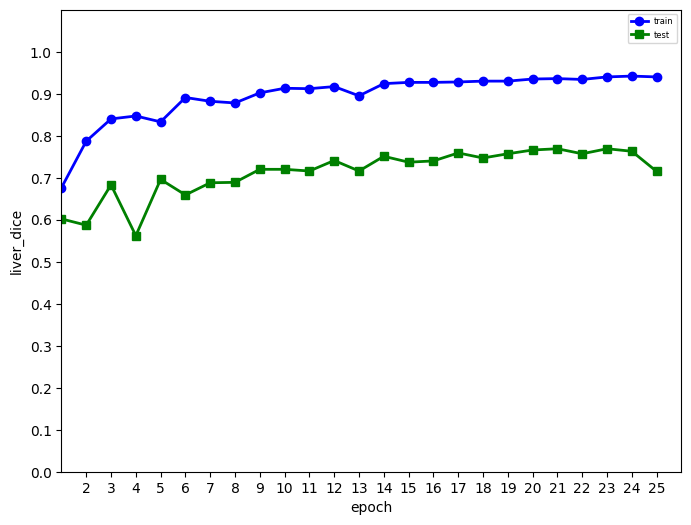

In [6]:
plot(
    list(map(lambda x:x['epoch'], train_list)),
    list(map(lambda x:x['liver_dice'], train_list)),
    list(map(lambda x:x['liver_dice'], test_list)),
    'epoch',
    'liver_dice',
)

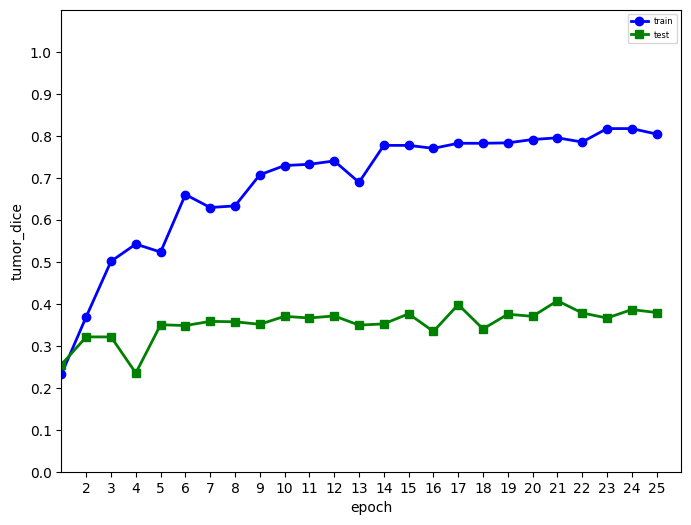

In [7]:
plot(
    list(map(lambda x:x['epoch'], train_list)),
    list(map(lambda x:x['tumor_dice'], train_list)),
    list(map(lambda x:x['tumor_dice'], test_list)),
    'epoch',
    'tumor_dice',
)

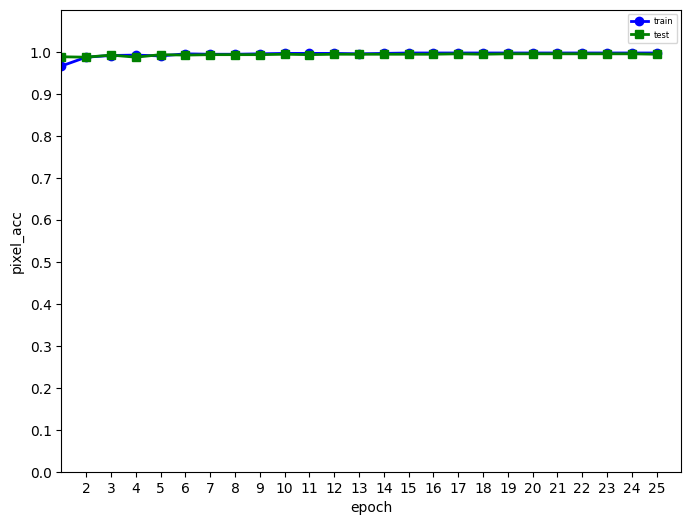

In [8]:
plot(
    list(map(lambda x:x['epoch'], train_list)),
    list(map(lambda x:x['pixel_acc'], train_list)),
    list(map(lambda x:x['pixel_acc'], test_list)),
    'epoch',
    'pixel_acc',
)

U-Net

In [9]:

def plot(x:list, y1:list, y2:list, x_label:str, y_label:str, y1_label:str="train", y2_label:str="test"):
    """
    show training metrics
    """
    #设置正常显示字符，用到这条语句是因为坐标轴包含负值，在调用上一条语句后不使用该语句则负号会乱码
    # plt.rcParams['axes.unicode_minus'] = False 

    # plot
    fig, ax = plt.subplots()

    A = ax.plot(x, y1, "bo-",linewidth=2.0, label=y1_label)
    B = ax.plot(x, y2, "gs-", linewidth=2.0, label=y2_label)

    ax.set(
        xlim=(0, 10), 
        xticks=np.arange(1, 10),
        ylim=(0, 1.1), 
        yticks=np.arange(0, 1.1, 0.1),
    )
    fig.set_size_inches((8, 6))

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    font1 = {
        'family': 'SimHei',
        'weight': 'normal',
        'size': 10, 
    }
    # ax.legend(handles=[A, B], prop=font1)
    ax.legend(loc="best",fontsize=6)



    plt.show()

In [10]:
with open('results.txt', 'r') as f:
    lines = f.readlines()

train_list = []
test_list = []
for line in lines:
    is_train = re.search('Train', line)
    is_valid = re.search('Valid', line)
    if is_train or is_valid:
        epoch = re.search(r'(\d+)/', line).group().replace('/', '')
        time = re.search(r'\d{2}:\d{2}', line).group()
        loss = re.search(r'loss=\d.\d+', line).group().replace('loss=', '')
        pixel_acc = re.search(r'pixel_acc=\d.\d+', line).group().replace('pixel_acc=', '')
        liver_dice = re.search(r'liver_dice=\d.\d+', line).group().replace('liver_dice=', '')
        tumor_dice = re.search(r'tumor_dice=\d.\d+', line).group().replace('tumor_dice=', '')
        data_obj = {
            "epoch": epoch,
            "seconds": time_to_sec(time),
            "loss": float(loss),
            "pixel_acc": float(pixel_acc),
            "liver_dice": float(liver_dice),
            "tumor_dice": float(tumor_dice),
        }
        if is_train:
            train_list.append(data_obj)
        else:
            test_list.append(data_obj)

In [11]:
sec = 0
for item in train_list:
    sec += item['seconds']
for item in test_list:
    sec += item['seconds']

_sec = sec % 60
sec -= _sec
_min = int(sec/60) % 60
_hour = int(sec/3600)

print(f"%02d:%02d:%02d"%(_hour, _min, _sec))

02:45:28


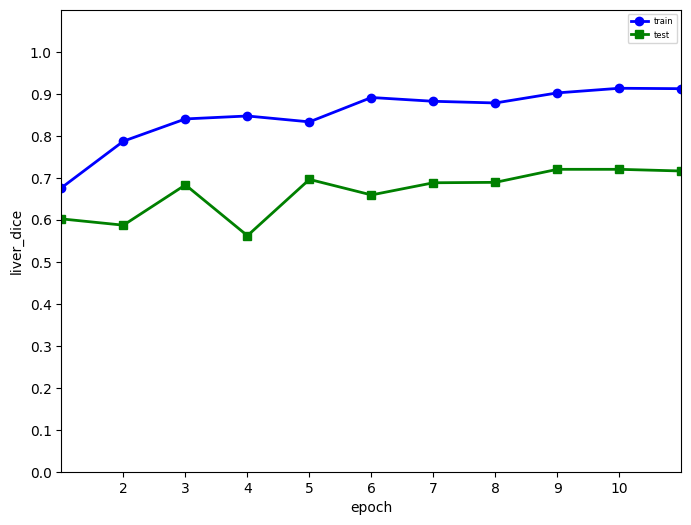

In [12]:
plot(
    list(map(lambda x:x['epoch'], train_list)),
    list(map(lambda x:x['liver_dice'], train_list)),
    list(map(lambda x:x['liver_dice'], test_list)),
    'epoch',
    'liver_dice',
)

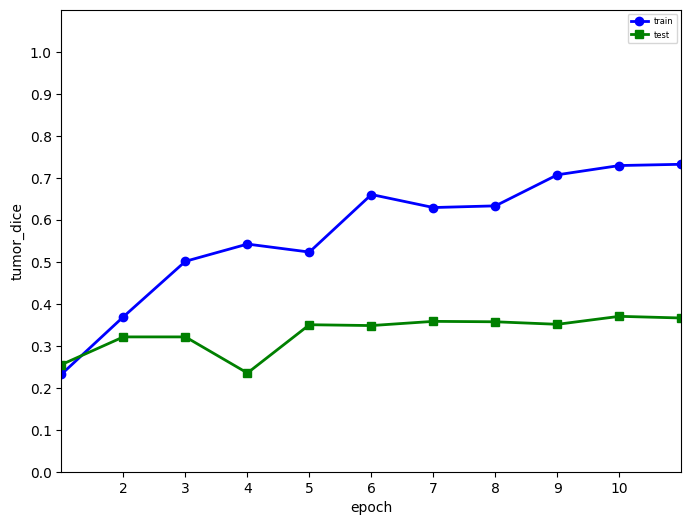

In [13]:
plot(
    list(map(lambda x:x['epoch'], train_list)),
    list(map(lambda x:x['tumor_dice'], train_list)),
    list(map(lambda x:x['tumor_dice'], test_list)),
    'epoch',
    'tumor_dice',
)

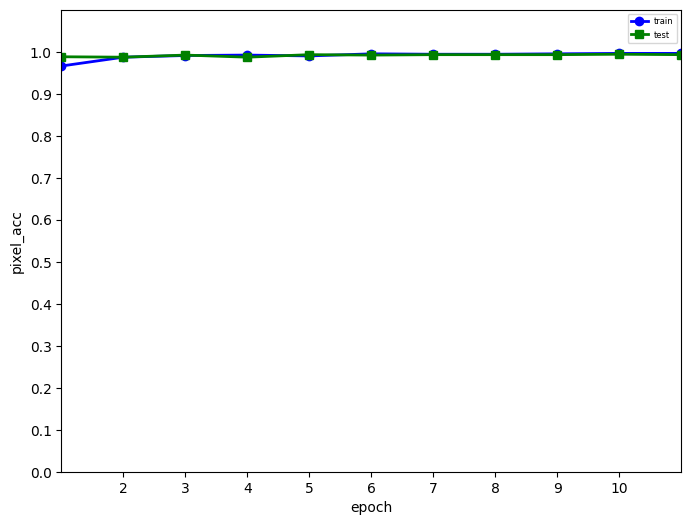

In [14]:
plot(
    list(map(lambda x:x['epoch'], train_list)),
    list(map(lambda x:x['pixel_acc'], train_list)),
    list(map(lambda x:x['pixel_acc'], test_list)),
    'epoch',
    'pixel_acc',
)